<a href="https://colab.research.google.com/github/thravt/AIProjectsHomework/blob/main/HW1_Tyler_Thraves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
import math
import pandas as pd
import matplotlib.pyplot as plt
import opendatasets as od
import numpy as np
import seaborn as sns
import random

Task 1 (20 points): Advanced Objective Function and Use Case


1. Derive the objective function for Logistic Regression using Maximum Likelihood
Estimation (MLE). Do some research on the MAP technique for Logistic Regression,
include your research on how this technique is different from MLE (include citations).


The MLE objective function for Logistic regression is NLL.
This is given as:



```
NLL(w) = -1/N log p(D|w) = -1/N log ∏ᴺ Ber(yₙ, μₙ)
```
In the above code, Ber(y|a) = (1-a) if y = 0, and a if y = 1.
D is the data set, and w is the weight vector (counting the bias term).
μₙ is equal to σ(wᵀxₙ), the sigmoid function on the weights for that entry/ the sigmoid function applied to the logit, since binary classification uses the sigmoid function.


The equation can be expanded out by moving from log of product to sum of log:
```
NLL(w) = -1/N ∑ᴺ log[μₙ^yₙ * (1-μₙ)^(1-yₙ)]
```
Applying the log directly gives us:

```
NLL(w) = -1/N ∑ᴺ [yₙlog(μₙ) * (1-yₙ)log(1-μₙ)]
```



MAP is similar to MLE, but includes the prior probability P(Θ), replacing P(D|Θ) with P(D|Θ)P(Θ). If the prior is constant, it can be ignored, and thus is equal to MLE. Otherwise, it has to be factored into the equation. MLE is often better when there's a lot of data, and MAP is better when there is very little data.

Source: https://medium.com/@devcharlie2698619/the-intuition-behind-maximum-likelihood-estimation-mle-and-maximum-a-posteriori-estimation-map-b8ba1ba1078f#:~:text=MLE's%20power%20lies%20in%20its,new%20evidence%20with%20existing%20beliefs.


2. Define a machine learning problem you wish to solve using Logistic Regression. Justify
why logistic regression is the best choice and compare it briefly to another linear
classification model (cite your work if this other technique was not covered in class).

A problem I would like to solve is the eligibility for a loan. I feel like logistic regression is the best choice as the data may not be linearly seperable, and it should fit the binary output well.

The binary nature of outputs would make linear regression a bad choice, as the data would be in 2 straight lines instead of just fitting to a single line, whereas the sigmoid function of logistic regression should fit that well.

There's also the fact that the data may not fit linearly to the output, which would cause problems in a Decision Tree based algorithm.

3. Discuss how your dataset corresponds to the variables in your equations, highlighting
any assumptions in your derivation from part 1.

My dataset corresponds to the variables, as the w parameters will correspond to the gender, mairrage status, # of dependents, education level, whether or not they're self employed, the applicant's income, the coapplicant's income, the loan amount, the duration of the loan, whether their credit history meets the guidelines, and the location of their home. The 'b' parameter acts as the intercept. The y value will be a binary label, stating whether the loan was approved or rejected.

Task 2 (20 points): Dataset and Advanced EDA

1. Select a publicly available dataset (excluding commonly used datasets such as Titanic,
Housing Prices or Iris). Provide a link to your dataset. Ensure the dataset has at least 10
features to allow for more complex analysis.

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tylerthraves
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan


100%|██████████| 7.80k/7.80k [00:00<00:00, 14.9MB/s]

https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan/data

2. Perform Exploratory Data Analysis (EDA), addressing potential multicollinearity among
features. Use Variance Inflation Factor (VIF) to identify highly correlated variables and
demonstrate steps to handle them.

In [ ]:
#get the file loaded
file =('eligibility-prediction-for-loan/\
Loan_Data.csv')
Database = pd.read_csv(file)

#Convert values to numerical values, including one-hot for the location
Database['Gender'] = Database['Gender'].replace({'Male': 1, 'Female': 0})
Database['Married'] = Database['Married'].replace({'Yes': 1, 'No': 0})
Database['Dependents'] = Database['Dependents'].replace({'3+': 3, '2': 2, '1': 1, '0': 0})
Database['Education'] = Database['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
Database['Self_Employed'] = Database['Self_Employed'].replace({'Yes': 1, 'No': 0})
Database['Loan_Status'] = Database['Loan_Status'].replace({'Y': 1, 'N': 0})
Database = Database.drop('Loan_ID', axis = 1)
Database = pd.get_dummies(Database)
#Ensure that all values have enough data
print(Database.isna().sum())

#Ok, credit history and Self_Employed have too many gaps
Database = Database.drop('Credit_History', axis = 1)
Database = Database.drop('Self_Employed', axis = 1)
#Fill categorical gaps with most common, numerical values with median
Database['Gender'].fillna(Database['Gender'].value_counts().idxmax(), inplace=True)
Database['Married'].fillna(Database['Married'].value_counts().idxmax(), inplace=True)
Database['Dependents'].fillna(Database['Married'].value_counts().idxmax(), inplace=True)
Database['LoanAmount'].fillna(Database['LoanAmount'].median(skipna=True), inplace=True)
Database['Loan_Amount_Term'].fillna(Database['Loan_Amount_Term'].median(skipna=True), inplace=True)
#Normalize data
Database['ApplicantIncome'] = (Database['ApplicantIncome'] - Database['ApplicantIncome'].mean()) / Database['ApplicantIncome'].std()
Database['CoapplicantIncome'] = (Database['CoapplicantIncome'] - Database['CoapplicantIncome'].mean()) / Database['CoapplicantIncome'].std()
Database['LoanAmount'] = (Database['LoanAmount'] - Database['LoanAmount'].mean()) / Database['LoanAmount'].std()
Database['Loan_Amount_Term'] = (Database['Loan_Amount_Term'] - Database['Loan_Amount_Term'].mean()) / Database['Loan_Amount_Term'].std()


print(Database.max())






Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Loan_Status                 0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64
Gender                           1.0
Married                          1.0
Dependents                       3.0
Education                          1
ApplicantIncome            12.374533
CoapplicantIncome          13.685015
LoanAmount                  6.589773
Loan_Amount_Term            2.135535
Loan_Status                        1
Property_Area_Rural             True
Property_Area_Semiurban         True
Property_Area_Urban             True
dtype: object


<ipython-input-3-5bb995be6865>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Database['Gender'] = Database['Gender'].replace({'Male': 1, 'Female': 0})
<ipython-input-3-5bb995be6865>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Database['Married'] = Database['Married'].replace({'Yes': 1, 'No': 0})
<ipython-input-3-5bb995be6865>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to 

I tried to do VIF by hand, but it was unfortunately giving me values less than 1, which is impossible. I left the code I was using to try it below. I know it is definitely wrong, as it currently doesn't use NLL. I couldn't figure out how to get NLL to work for non-binary variables though, so that's probably a big reason for the problems.

In [ ]:

#R^2 Calculation
def R2(c, avg):
  return 1 - (c / avg)
#VIF Calculation
def VIF(r):
  return 1/(1-r)

#sigmoid function
def sigmoid(x):
  a = np.array(x, dtype=np.float32)
  a = np.clip(a, -10, 10)
  return 1/(1 + np.exp(-a))




#update for gradient descent
#this update function should work for all 3 (batch, mini-batch, stochastic), just make sure the derivative is correct
def update(old, derivative, learning_rate):
  return old - (learning_rate * derivative)

#Negative logistic loss:
def NLL(w, x, b, y, N):
  a = sigmoid(np.dot(w.T, x) + b)

  return -1/N * np.sum(np.multiply(y, np.log(a).T) + np.multiply(1-y, np.log(1-a).T))

#Derivative for w
def DerivativeW(w, x, b, y, N):
  a = sigmoid(np.dot(w.T, x) + b)
  return 1/ N * np.dot(x, (a - y.T).T)
def DerivativeB(w, x, b, y, N):
  a = sigmoid(np.dot(w.T, x) + b)
  return 1/ N * np.sum(a - y.T)


#Initialized values for Gender
y = Database['Gender'].to_numpy().reshape(-1, 1)
x = Database.drop('Gender', axis = 1).T
x = x.drop('Loan_Status', axis = 0)
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000



#Runs logistic regression
for i in range(epochs):
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)



a = sigmoid(np.dot(w.T, x) + b)
GenderR2 = np.mean(np.abs((a - y)))

nulldata = Database['Gender'].mean()
nullcolumn = Database['Gender'] - nulldata
nullcolumn = nullcolumn.abs()
nulldata = nullcolumn.mean()
print("Gender VIF:")
print(VIF(R2(GenderR2, nulldata)))

#Initialized values for Married
y = Database['Married'].to_numpy().reshape(-1, 1)
x = Database.drop('Married', axis = 1).T
x = x.drop('Loan_Status', axis = 0)
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000



#Runs logistic regression
for i in range(epochs):
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)



a = sigmoid(np.dot(w.T, x) + b)
MarriedR2 = np.mean(np.abs((a - y)))

nulldata = Database['Married'].mean()
nullcolumn = Database['Married'] - nulldata
nullcolumn = nullcolumn.abs()
nulldata = nullcolumn.mean()
print("Married VIF:")
print(VIF(R2(MarriedR2, nulldata)))

#Initialized values for Dependents
y = Database['Dependents'].to_numpy().reshape(-1, 1)
x = Database.drop('Dependents', axis = 1).T
x = x.drop('Loan_Status', axis = 0)
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000



#Runs logistic regression
for i in range(epochs):
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)



a = sigmoid(np.dot(w.T, x) + b)
DependentsR2 = np.mean(np.abs((a - y)))

nulldata = Database['Dependents'].mean()
nullcolumn = Database['Dependents'] - nulldata
nullcolumn = nullcolumn.abs()
nulldata = nullcolumn.mean()
print("Dependents VIF:")
print(VIF(R2(DependentsR2, nulldata)))

#Initialized values for Education
y = Database['Education'].to_numpy().reshape(-1, 1)
x = Database.drop('Education', axis = 1).T
x = x.drop('Loan_Status', axis = 0)
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000



#Runs logistic regression
for i in range(epochs):
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)



a = sigmoid(np.dot(w.T, x) + b)
EducationR2 = np.mean(np.abs((a - y)))

nulldata = Database['Education'].mean()
nullcolumn = Database['Education'] - nulldata
nullcolumn = nullcolumn.abs()
nulldata = nullcolumn.mean()
print("Education VIF:")
print(VIF(R2(EducationR2, nulldata)))



#Initialized values for ApplicantIncome
y = Database['ApplicantIncome'].to_numpy().reshape(-1, 1)
x = Database.drop('ApplicantIncome', axis = 1).T
x = x.drop('Loan_Status', axis = 0)
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000



#Runs logistic regression
for i in range(epochs):
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)



a = sigmoid(np.dot(w.T, x) + b)
ApplicantIncomeR2 = np.mean(np.abs((a - y)))

nulldata = Database['ApplicantIncome'].mean()
nullcolumn = Database['ApplicantIncome'] - nulldata
nullcolumn = nullcolumn.abs()
nulldata = nullcolumn.mean()
print("ApplicantIncome VIF:")
print(VIF(R2(ApplicantIncomeR2, nulldata)))

#Initialized values for CoapplicantIncome
y = Database['CoapplicantIncome'].to_numpy().reshape(-1, 1)
x = Database.drop('CoapplicantIncome', axis = 1).T
x = x.drop('Loan_Status', axis = 0)
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000



#Runs logistic regression
for i in range(epochs):
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)



a = sigmoid(np.dot(w.T, x) + b)
CoapplicantIncomeR2 = np.mean(np.abs((a - y)))

nulldata = Database['CoapplicantIncome'].mean()
nullcolumn = Database['CoapplicantIncome'] - nulldata
nullcolumn = nullcolumn.abs()
nulldata = nullcolumn.mean()
print("CoapplicantIncome VIF:")
print(VIF(R2(CoapplicantIncomeR2, nulldata)))

#Initialized values for LoanAmount
y = Database['LoanAmount'].to_numpy().reshape(-1, 1)
x = Database.drop('LoanAmount', axis = 1).T
x = x.drop('Loan_Status', axis = 0)
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000



#Runs logistic regression
for i in range(epochs):
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)



a = sigmoid(np.dot(w.T, x) + b)
LoanAmountR2 = np.mean(np.abs((a - y)))

nulldata = Database['LoanAmount'].mean()
nullcolumn = Database['LoanAmount'] - nulldata
nullcolumn = nullcolumn.abs()
nulldata = nullcolumn.mean()
print("LoanAmount VIF:")
print(VIF(R2(LoanAmountR2, nulldata)))



#Initialized values for Loan_Amount_Term
y = Database['Loan_Amount_Term'].to_numpy().reshape(-1, 1)
x = Database.drop('Loan_Amount_Term', axis = 1).T
x = x.drop('Loan_Status', axis = 0)
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000



#Runs logistic regression
for i in range(epochs):
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)



a = sigmoid(np.dot(w.T, x) + b)
Loan_Amount_TermR2 = np.mean(np.abs((a - y)))

nulldata = Database['Loan_Amount_Term'].mean()
nullcolumn = Database['Loan_Amount_Term'] - nulldata
nullcolumn = nullcolumn.abs()
nulldata = nullcolumn.mean()
print("Loan_Amount_Term VIF:")
print(VIF(R2(Loan_Amount_TermR2, nulldata)))




#Initialized values for Property_Area_Rural
y = Database['Property_Area_Rural'].to_numpy().reshape(-1, 1)
x = Database.drop('Property_Area_Rural', axis = 1).T
x = x.drop('Loan_Status', axis = 0)
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000



#Runs logistic regression
for i in range(epochs):
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)



a = sigmoid(np.dot(w.T, x) + b)
Property_Area_RuralR2 = np.mean(np.abs((a - y)))

nulldata = Database['Property_Area_Rural'].mean()
nullcolumn = Database['Property_Area_Rural'] - nulldata
nullcolumn = nullcolumn.abs()
nulldata = nullcolumn.mean()
print("Property_Area_Rural VIF:")
print(VIF(R2(Property_Area_RuralR2, nulldata)))



#Initialized values for Property_Area_Semiurban
y = Database['Property_Area_Semiurban'].to_numpy().reshape(-1, 1)
x = Database.drop('Property_Area_Semiurban', axis = 1).T
x = x.drop('Loan_Status', axis = 0)
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000



#Runs logistic regression
for i in range(epochs):
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)



a = sigmoid(np.dot(w.T, x) + b)
Property_Area_SemiurbanR2 = np.mean(np.abs((a - y)))

nulldata = Database['Property_Area_Semiurban'].mean()
nullcolumn = Database['Property_Area_Semiurban'] - nulldata
nullcolumn = nullcolumn.abs()
nulldata = nullcolumn.mean()
print("Property_Area_Semiurban VIF:")
print(VIF(R2(Property_Area_SemiurbanR2, nulldata)))



#Initialized values for Property_Area_Urban
y = Database['Property_Area_Urban'].to_numpy().reshape(-1, 1)
x = Database.drop('Property_Area_Urban', axis = 1).T
x = x.drop('Loan_Status', axis = 0)
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000



#Runs logistic regression
for i in range(epochs):
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)



a = sigmoid(np.dot(w.T, x) + b)
Property_Area_UrbanR2 = np.mean(np.abs((a - y)))

nulldata = Database['Property_Area_Urban'].mean()
nullcolumn = Database['Property_Area_Urban'] - nulldata
nullcolumn = nullcolumn.abs()
nulldata = nullcolumn.mean()
print("Property_Area_Urban VIF:")
print(VIF(R2(Property_Area_UrbanR2, nulldata)))

Gender VIF:
0.9999999991730999
Married VIF:
1.0000000000000002
Dependents VIF:
1.0011035018019294
Education VIF:
0.9999999997595244
ApplicantIncome VIF:
0.860245159557837
CoapplicantIncome VIF:
0.9386403040056261
LoanAmount VIF:
0.8981044909951562
Loan_Amount_Term VIF:
0.978876238381837
Property_Area_Rural VIF:
1.0005058279643073
Property_Area_Semiurban VIF:
1.000259144746802
Property_Area_Urban VIF:
1.0003865518661195


I've been unable to figure out how to properly implement VIF, and I'm running out of time. I've been trying hard, but I just can't figure it out. I'm going to revisit this later if I have time, but for now I'm going to focus on part 4, since I feel I'll be able to make more progress on that. If this is still here, I never figured out how to fix it.

3. Visualize the dataset's feature relationships, ensuring inclusion of at least two advanced
visualization techniques (e.g., pair plots with KDE, heatmaps with clustering).

pairplot


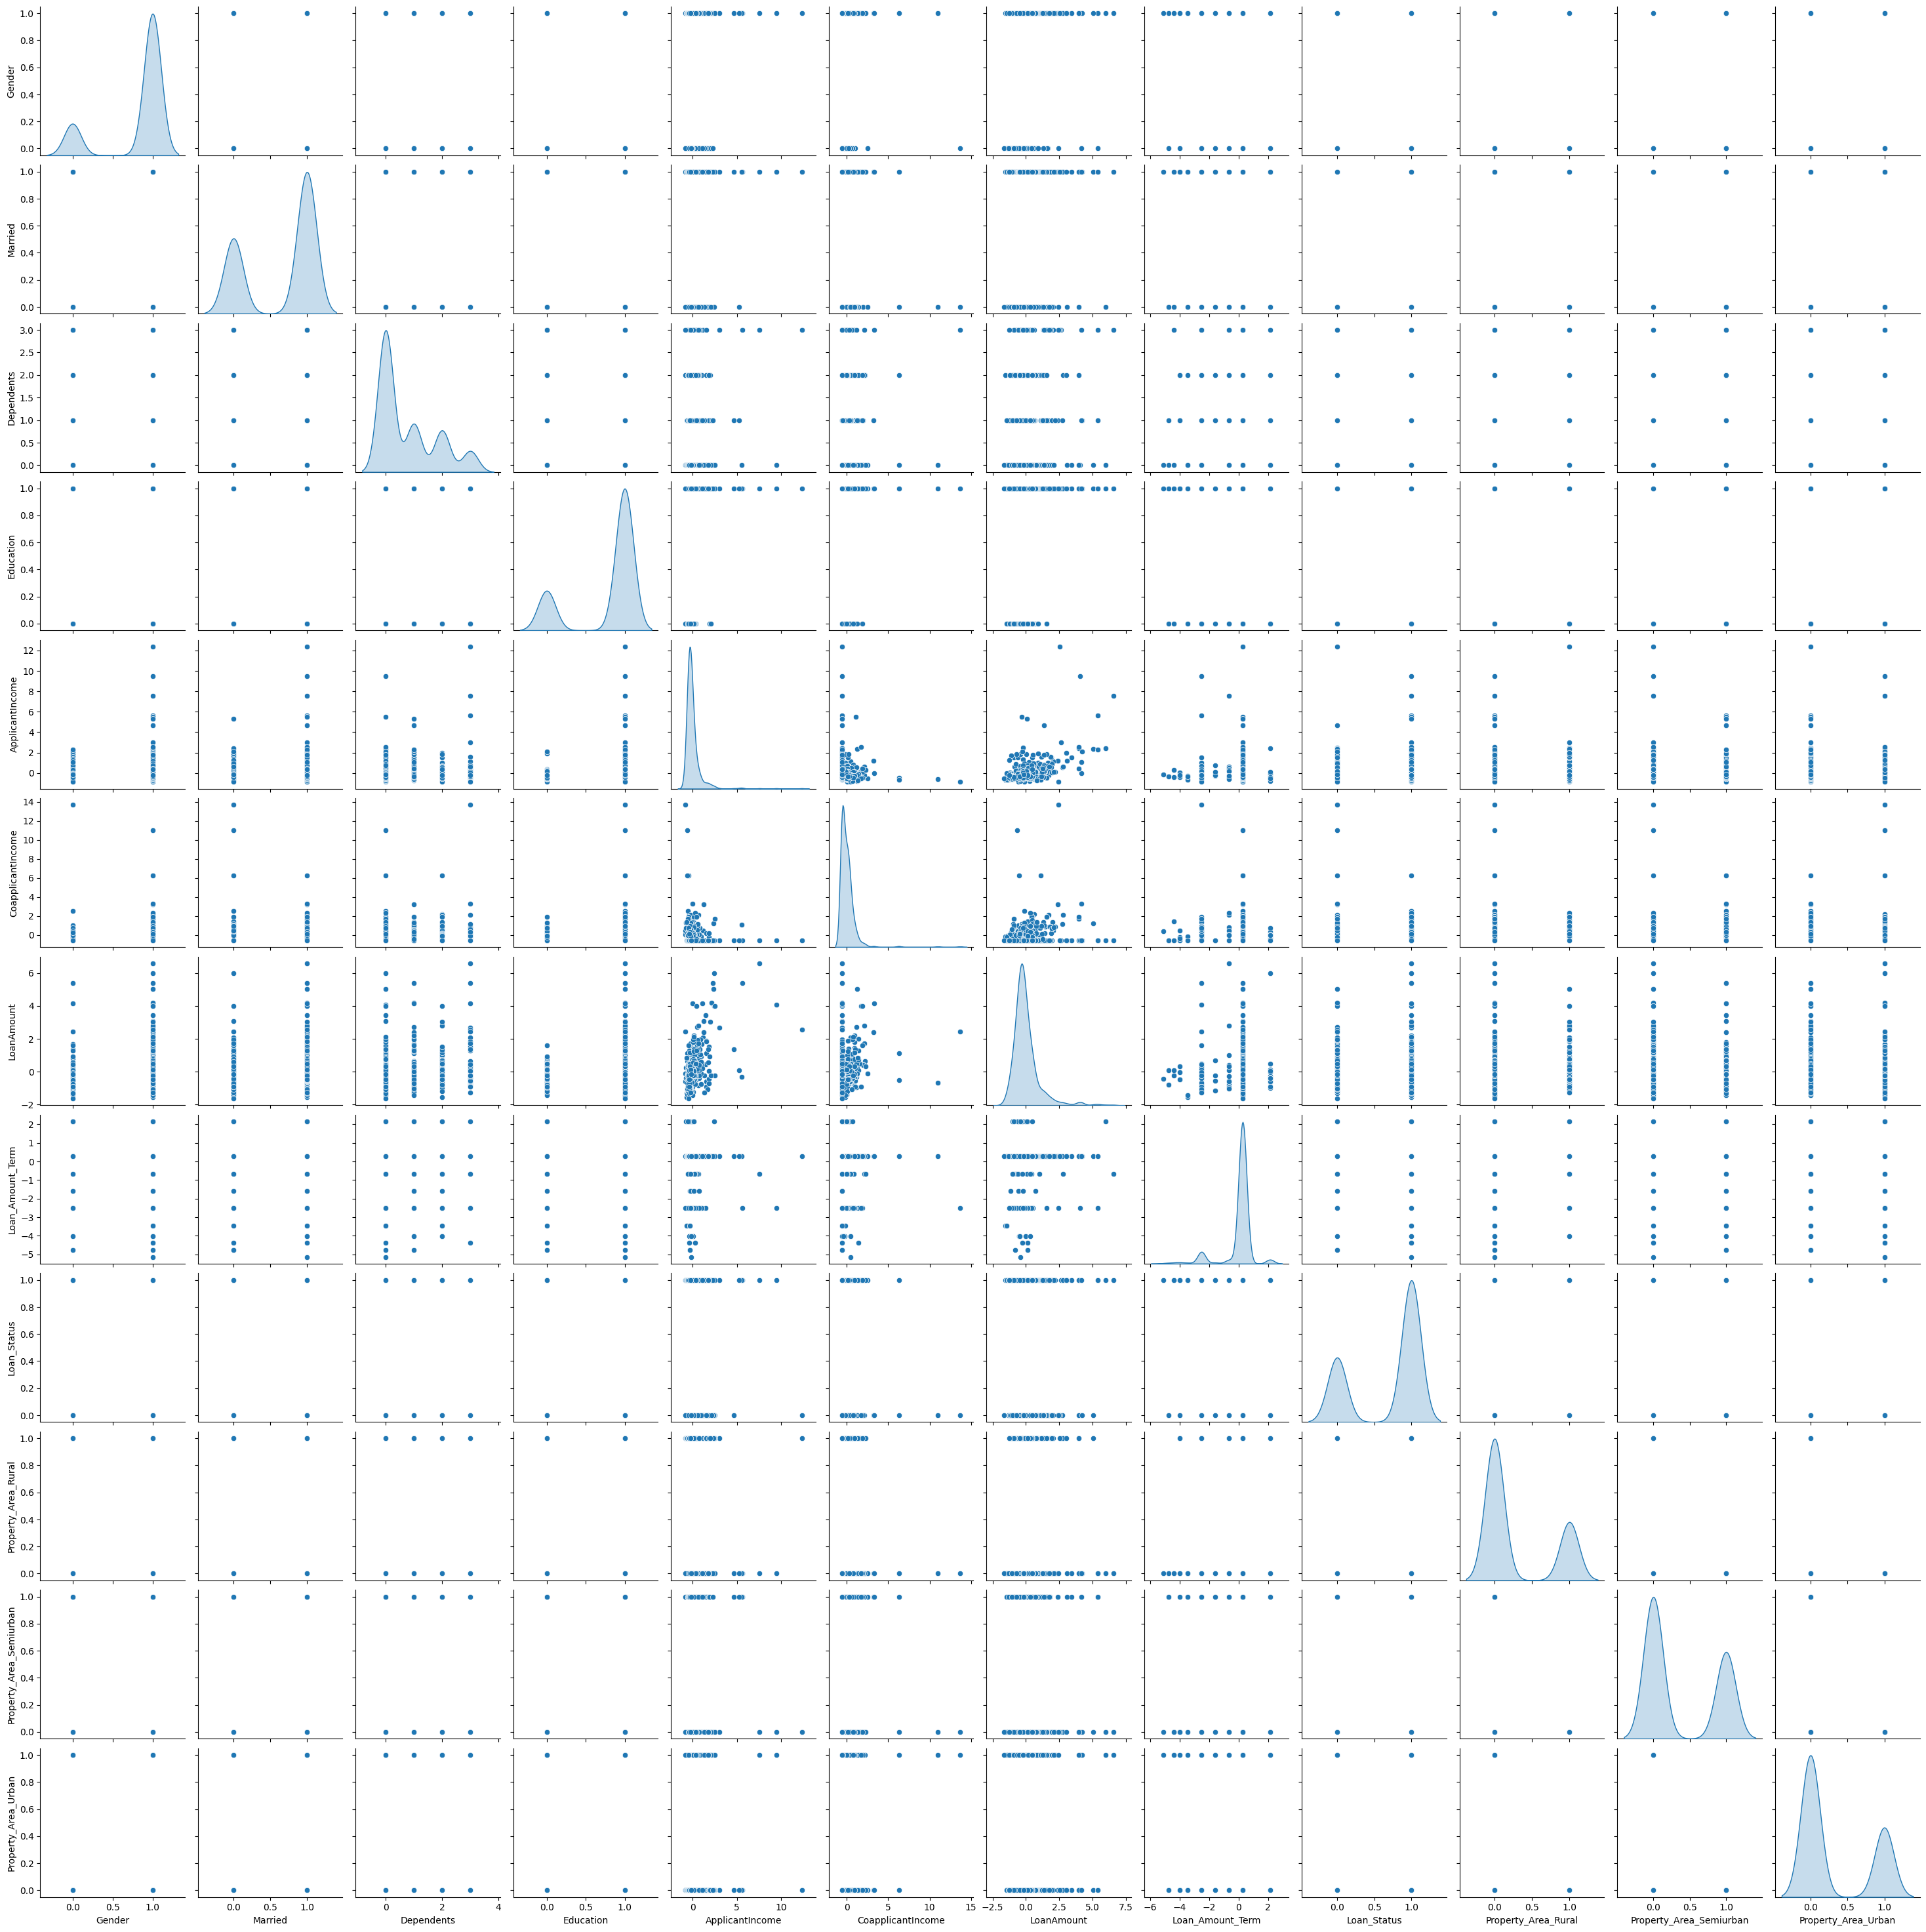

In [ ]:
print("pairplot")
sns.pairplot(Database, diag_kind='kde')



heatmap


<Axes: >

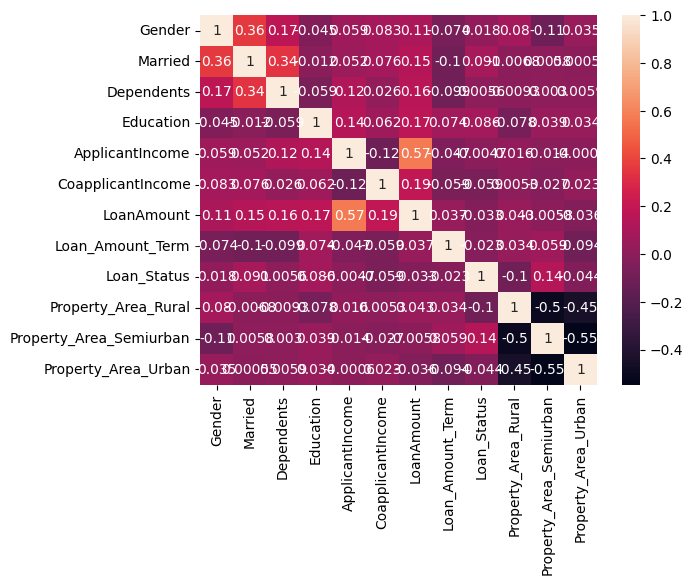

In [ ]:
print("heatmap")
sns.heatmap(Database.corr(), annot= True)

For the Scatter plot, there seems to be a high amount of men, and most have 0 dependents. There's also a majority that are educated, and incomes and loan amounts are generally on the lower end. The closest amount of correlation seems to be with the loan amount and the applicant income, although the scatter plot for those two does still seem scattered throughout. If I had been able to properly implement VIF, I would have used that to decide whether or not to keep Loan_Amount, but since I couldn't I left it in.

Task 3 (20 points): Logistic Regression Implementation

1. Implement Logistic Regression from scratch, including the vectorized implementation of
cost function and gradient descent.

Since the code was in my attempt at VIF, the functions are the same as above, but with the proper y value.

[0.69314718]
[0.60363926]
[0.60104142]
[0.60040043]
[0.60014597]
[0.60000891]
[0.59992242]
[0.5998634]
[0.59982138]
[0.59979065]
[0.59976775]
[0.59975045]
[0.59973724]
[0.59972707]
[0.5997192]
[0.59971308]
[0.59970829]
[0.59970454]
[0.59970161]
[0.5996993]
[0.59969748]
[0.59969605]
[0.59969493]
[0.59969404]
[0.59969333]
[0.59969277]
[0.59969234]
[0.59969199]
[0.59969172]
[0.59969151]
[0.59969134]
[0.59969121]
[0.59969109]
[0.59969101]
[0.59969094]
[0.5996909]
[0.59969085]
[0.59969082]
[0.5996908]
[0.59969078]
[0.59969076]
[0.59969075]
[0.59969074]
[0.59969073]
[0.59969072]
[0.59969072]
[0.59969071]
[0.59969071]
[0.59969071]
[0.59969071]
[0.5996907]
[0.5996907]
[0.5996907]
[0.5996907]
[0.59969071]
[0.5996907]
[0.5996907]
[0.5996907]
[0.5996907]
[0.5996907]
[0.5996907]
[0.5996907]
[0.5996907]
[0.5996907]
[0.5996907]
[0.5996907]
[0.5996907]
[0.5996907]
[0.5996907]
[0.5996907]
[0.5996907]
[0.5996907]
[0.5996907]
[0.5996907]
[0.5996907]
[0.5996907]
[0.5996907]
[0.5996907]
[0.5996907]
[0.599

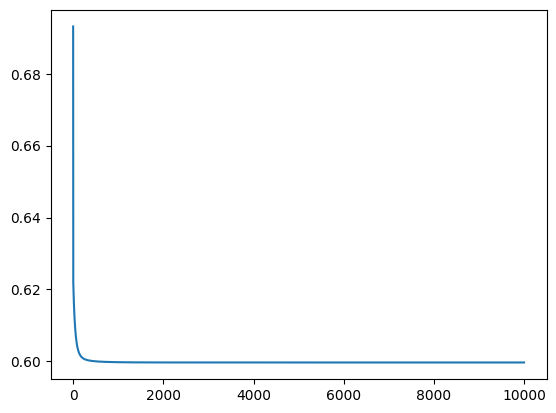

In [ ]:
#Initialized values
y = Database['Loan_Status'].to_numpy().reshape(-1, 1)
x = Database.drop('Loan_Status', axis = 1).T
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000


#Runs logistic regression
lossgraph = np.zeros((epochs, 1))
for i in range(epochs):
  lossgraph[i] = NLL(w, x, b, y, N)
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)
  if i % 100 == 0:
    print(lossgraph[i])
plt.plot(lossgraph)




2. Implement and compare the three gradient descent variants (e.g., batch gradient
descent, stochastic gradient descent, and mini-batch gradient descent). Explain their
convergence properties with respect to your cost function.

Batch gradient descent has already been implemented above. In order to implement stochastic, I used a random number shuffler in order to ensure the data points were picked randomly and that they all were used. Mini-batch was the same as stochastic, but I had a group timer as well that would divide the gradient by the size of the group, and update the w, b values.

In [ ]:
#randomized ordering for stochastic and mini-batch
order = list(range(0, len(y)))
random.shuffle(order)
print(order)

[563, 535, 51, 584, 205, 611, 519, 157, 359, 323, 222, 216, 317, 350, 270, 161, 543, 436, 367, 223, 499, 495, 16, 525, 268, 609, 166, 113, 522, 18, 514, 153, 427, 503, 410, 490, 457, 442, 237, 392, 241, 299, 378, 605, 96, 1, 73, 255, 207, 405, 272, 194, 148, 565, 215, 595, 0, 20, 397, 316, 149, 37, 99, 448, 186, 395, 131, 218, 181, 17, 534, 118, 95, 36, 243, 398, 201, 67, 259, 155, 385, 45, 510, 76, 9, 305, 390, 244, 343, 164, 531, 264, 136, 581, 409, 188, 27, 606, 19, 197, 553, 554, 280, 31, 599, 569, 417, 528, 441, 468, 175, 7, 416, 212, 557, 393, 334, 496, 151, 561, 325, 363, 425, 379, 56, 313, 430, 526, 511, 256, 192, 213, 176, 233, 59, 102, 195, 217, 50, 172, 139, 437, 341, 93, 346, 411, 178, 446, 32, 602, 589, 65, 160, 391, 549, 386, 108, 290, 284, 111, 338, 297, 380, 254, 46, 483, 541, 137, 40, 396, 156, 413, 291, 331, 547, 88, 281, 171, 537, 491, 252, 340, 21, 423, 435, 66, 384, 358, 41, 94, 529, 339, 57, 488, 44, 500, 107, 173, 327, 572, 470, 83, 129, 360, 165, 591, 298, 573, 

0.6931471824645996
0.6923292088003811
0.6915188507459064
0.6907160039445088
0.6899209818544916
0.6891335435333004
0.6883533718337453
0.6875808144819465
0.6868154493915919
0.6860576304045873
0.6853068111773811
0.6845632079952315
0.6838266381611654
0.6830970484775518
0.682374643968837
0.6816590797241038
0.6809503635094298
0.680248533087367
0.6795533605235408
0.6788649637652531
0.6781832268067214
0.6775080520865971
0.6768393663125241
0.6761772373406041
0.6755216087696996
0.6748723753694603
0.6742293974475675
0.6735927266484364
0.6729623271510345
0.6723380689706399
0.6717200639387684
0.6711078795819796
0.670501758978499
0.66990188987325
0.6693077091285383
0.6687195498120125
0.668137063323869
0.66756040420905
0.6669894400559342
0.6664243077416374
0.6658647817586844
0.6653108763772424
0.664762383078131
0.6642193415654211
0.663681747956074
0.6631496134138263
0.6626228334849354
0.6621014365155845
0.6615854067794663
0.6610744755702997
0.660568639199198
0.6600679454275373
0.6595723812471384
0.65

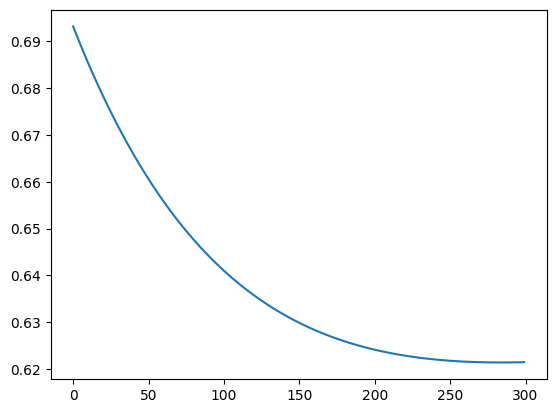

In [ ]:
#Initialized values for stochastic
y = Database['Loan_Status'].to_numpy().reshape(-1, 1)
x = Database.drop('Loan_Status', axis = 1).T.to_numpy()
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.000002
epochs = 300


#Runs logistic regression for stochastic
lossgraph = np.zeros((epochs))
for i in range(epochs):
  order = list(range(0, len(y)))
  random.shuffle(order)
  lossgraph[i] = NLL(w, x, b, y, N)
  for j in order:
    dw = DerivativeW(w, x[0][j], b, y[j][0], 1)
    db = DerivativeB(w, x[0][j], b, y[j][0], 1)
    w = update(w, dw, alpha)
    b = update(b, db, alpha)
  print(lossgraph[i])
plt.plot(lossgraph)

[0.69314718]
[0.68921368]
[0.6854886]
[0.68188312]
[0.67849268]
[0.67533411]
[0.67226557]
[0.66937744]
[0.66654004]
[0.66385804]
[0.661354]
[0.65887756]
[0.65654741]
[0.65438488]
[0.65221837]
[0.65019676]
[0.64832809]
[0.64652571]
[0.64484631]
[0.64325547]
[0.64172421]
[0.64029169]
[0.63887714]
[0.63760826]
[0.63643563]
[0.63530068]
[0.6341654]
[0.6331404]
[0.63220536]
[0.63126684]
[0.63044137]
[0.62966098]
[0.62890757]
[0.62821142]
[0.62758238]
[0.62699177]
[0.62642679]
[0.62586424]
[0.62536527]
[0.62492686]
[0.62451123]
[0.62412747]
[0.62377145]
[0.62346713]
[0.62318355]
[0.62290911]
[0.62267793]
[0.62244436]
[0.62225807]
[0.62208508]
[0.62192813]
[0.62180947]
[0.62170376]
[0.62161361]
[0.62154169]
[0.6214869]
[0.62144852]
[0.62142587]
[0.62141777]
[0.62142367]
[0.62144317]
[0.62147334]
[0.62151355]
[0.6215652]
[0.62162582]
[0.62170422]
[0.62179024]
[0.62187852]
[0.62197729]
[0.62208455]


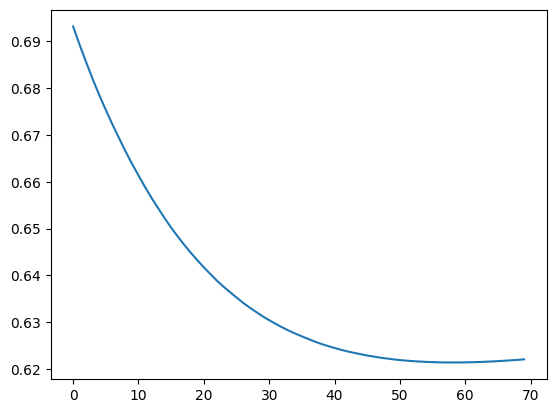

In [ ]:
#Initialized values for mini-batch
y = Database['Loan_Status'].to_numpy().reshape(-1, 1)
x = Database.drop('Loan_Status', axis = 1).T.to_numpy()
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.0002
epochs = 70
batchsize = 20

#Runs logistic regression for stochastic
lossgraph = np.zeros((epochs, 1))
for i in range(epochs):
  order = list(range(0, len(y)))
  random.shuffle(order)
  batchnumber = 0
  dw = np.zeros(shape = (x.shape[0], 1))
  db = 0
  lossgraph[i] = NLL(w, x, b, y, N)
  for j in order:
    batchnumber = batchnumber + 1
    dw = dw + DerivativeW(w, x[0][j], b, y[j][0], 1)
    db = db + DerivativeB(w, x[0][j], b, y[j][0], 1)
    if batchnumber == 20:
      dw = dw / batchnumber
      db = db / batchnumber
      batchnumber = 0
      w = update(w, dw, alpha)
      b = update(b, db, alpha)
      dw = np.zeros(shape = (x.shape[0], 1))
      db = 0
  print(lossgraph[i])
plt.plot(lossgraph)

Stochastic seems to converge in less epochs than batch, but isn't as accurate.
Batch seems to be the least prone to errors, but takes the most epochs to converge.
Mini-batch converged fastest, but wasn't as accurate.

I know that Batch is supposed to be the slowest and least vulnerable to noise, so that seems good. Stochastic is supposed to be fastest, but most prone to noise, so it's somewhat concerning that Mini-batch was faster. Mini-batch is supposed to be a middle value, so it's weird that it seemed more error-prone than stochastic.

There's also the fact that if I had ran stochastic and mini-batch for longer, the loss for those would end up increasing. That's probably not supposed to happen, so clearly something is going wrong there.

Task 4 (40 points): Optimization Techniques and Advanced Comparison


1. Implement or use packages to incorporate any three optimization algorithms (e.g.,
Momentum, RMSProp, Adam). Compare their performance with the vanilla stochastic
gradient descent implementation from Task 3.

I decided to implement Adam, Momentum and RMSProp, as It would allow me to see the importance of having momentum, as well as to directly compare Adam and RMSProp since they were similar.

In [ ]:
import tensorflow as tf
from sklearn.metrics import f1_score

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
#adam optimizer
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision()])

In [ ]:
#Initialized values
y = Database['Loan_Status']
x = Database.drop('Loan_Status', axis = 1)

model.fit(x, y, epochs=100, batch_size=1)
adamresults = model.evaluate(x, y)
adamf1a = model.predict(x)
adamf1a = (adamf1a > 0.5).astype(int)
adamf1 = f1_score(y, adamf1a)


Epoch 1/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5952 - loss: 0.6989 - precision: 0.6509
Epoch 2/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6428 - loss: 0.6712 - precision: 0.6819
Epoch 3/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6407 - loss: 0.6679 - precision: 0.6738
Epoch 4/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6403 - loss: 0.6527 - precision: 0.6793
Epoch 5/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6566 - loss: 0.6372 - precision: 0.6839
Epoch 6/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6786 - loss: 0.6178 - precision: 0.7013
Epoch 7/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6270 - loss: 0.6665 - precision: 0.6540
Epoch 8/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6675 - loss: 0.6321 - precision: 0.6833
Epoch 9/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6695 - loss: 0.6203 - precision: 0.6978
Epoch 10/100
614/614 ━━━━━━━━━━━━━━━━

In [ ]:
print(adamf1)

0.8111332007952287


In [ ]:
#momentum optimizer:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision()])
model.fit(x, y, epochs = 100, batch_size=1)
momentumresults = model.evaluate(x, y)
momentumf1a = model.predict(x)
momentumf1a = (momentumf1a > 0.5).astype(int)
momentumf1 = f1_score(y, momentumf1a)
print(momentumf1)


Epoch 1/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7716 - loss: 0.5042 - precision_2: 0.7956
Epoch 2/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7745 - loss: 0.4941 - precision_2: 0.7911
Epoch 3/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7877 - loss: 0.5652 - precision_2: 0.8278
Epoch 4/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7507 - loss: 0.5780 - precision_2: 0.7574
Epoch 5/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7976 - loss: 0.5077 - precision_2: 0.8110
Epoch 6/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7351 - loss: 0.5833 - precision_2: 0.7785
Epoch 7/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7594 - loss: 0.6168 - precision_2: 0.7869
Epoch 8/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7604 - loss: 0.5361 - precision_2: 0.7809
Epoch 9/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7755 - loss: 0.5695 - precision_2: 0.8007
Epoch 10/100
480/48

In [ ]:
#rmsprop optimizer:
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision()])
model.fit(x, y, epochs = 100, batch_size=1)
rmspropresults = model.evaluate(x, y)
rmspropf1a = model.predict(x)
rmspropf1a = (rmspropf1a > 0.5).astype(int)
rmspropf1 = f1_score(y, rmspropf1a)
print(rmspropf1)

Epoch 1/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6681 - loss: 0.6016 - precision_1: 0.6745
Epoch 2/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6884 - loss: 0.5831 - precision_1: 0.6947
Epoch 3/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7161 - loss: 0.5645 - precision_1: 0.7267
Epoch 4/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6852 - loss: 0.5993 - precision_1: 0.6922
Epoch 5/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7120 - loss: 0.5849 - precision_1: 0.7154
Epoch 6/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6835 - loss: 0.6140 - precision_1: 0.6877
Epoch 7/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6846 - loss: 0.6166 - precision_1: 0.6849
Epoch 8/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6958 - loss: 0.5865 - precision_1: 0.7102
Epoch 9/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6501 - loss: 0.6427 - precision_1: 0.6571
Epoch 10/100
614/61

Momentum gave the best loss at .56, a bit better than my batch gradient descent. Adam and RMSProp were a bit better than my stochastic and mini-batch, but honestly not as good as I was hoping.


2. Define and use multiple evaluation metrics (e.g., precision, recall, F1 score) to analyze
and interpret results for each algorithm.

Adam: f1: 0.8111332007952287 - accuracy: 0.6791 - loss: 0.6075 - precision: 0.6842

Momentum: f1 : 0.876010781671159 - accuracy: 0.7854 - loss: 0.5695 - precision: 0.7658

RMSProp: f1 : 0.8115079365079365 - accuracy: accuracy: 0.6778 - loss: 0.6221 - precision: 0.6826

We can see that each of these algorithms have a good balance between precision and recall, but the precision for Adam and RMSProp was below expectations on precision and accuracy. They all had similar loss to stochastic and mini-batch, but momentum was a bit better than batch.The data was normalized before this, but it is entirely possible that the data just wasn't a good fit for logistic regression.

3. Perform a hyperparameter tuning process (manual or automated using grid
search/random search) for each optimization algorithm and assess its impact on
performance. If you have to do some research for these techniques, please cite your
sources.


I will be using grid search for each algorithm. I will tune the learning rate for each optimizer (1x default, 2x default and 3x default), along with a secondary value for each, (Beta1 for Adam, momentum for momentum, and rho for RMSProp). The extra value will have the baseline value, .1 subtracted, and .2 subtracted. This will be done manually using for loops. For the sake of computation time each will run for 20 epochs. I learned about grid search from this website: https://medium.com/@jackstalfort/hyperparameter-tuning-using-grid-search-and-random-search-f8750a464b35, but coded it myself. Adam and RMSProp didn't show those options by default, so I had to manually look up the defaults for those parameters.

In [ ]:
#hyperparameter tuning for Adam:
for i in range (3):
  for j in range (3):
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001 * (1 + i), beta_1=0.9 - (.1 * j), beta_2=0.999, epsilon=1e-8)
    model.compile(optimizer= optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision()])
    y = Database['Loan_Status']
    x = Database.drop('Loan_Status', axis = 1)
    model.fit(x, y, epochs=20, batch_size=1)
    adamresults = model.evaluate(x, y)
    adamf1a = model.predict(x)
    adamf1a = (adamf1a > 0.5).astype(int)
    adamf1 = f1_score(y, adamf1a)
    print(adamf1)

Epoch 1/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6889 - loss: 0.7352 - precision_2: 0.6889
Epoch 2/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6831 - loss: 0.7255 - precision_2: 0.6839
Epoch 3/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6706 - loss: 0.6760 - precision_2: 0.6877
Epoch 4/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7055 - loss: 0.6555 - precision_2: 0.7127
Epoch 5/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6938 - loss: 0.6693 - precision_2: 0.6961
Epoch 6/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6794 - loss: 0.6330 - precision_2: 0.6861
Epoch 7/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7216 - loss: 0.6040 - precision_2: 0.7299
Epoch 8/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7075 - loss: 0.6044 - precision_2: 0.7135
Epoch 9/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6695 - loss: 0.6655 - precision_2: 0.6816
Epoch 10/20
614/614 ━━━━━━━━

The best result for Adam hyperparameter tuning was a learning rate of 0.003 and a beta1 of .8, giving an acccuracy of .6794 and a loss of .6057.

In [ ]:
#hyperparameter tuning for momentum
for i in range (3):
  for j in range (3):
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01 * (1 + i), momentum=0.9 - (.1 * j))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision()])
    model.fit(x, y, epochs = 20, batch_size=1)
    momentumresults = model.evaluate(x, y)
    momentumf1a = model.predict(x)
    momentumf1a = (momentumf1a > 0.5).astype(int)
    momentumf1 = f1_score(y, momentumf1a)
    print(momentumf1)

Epoch 1/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6694 - loss: 0.6320 - precision_11: 0.7105
Epoch 2/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5820 - loss: 0.7129 - precision_11: 0.6623
Epoch 3/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6104 - loss: 0.6949 - precision_11: 0.6657
Epoch 4/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6328 - loss: 0.6851 - precision_11: 0.6893
Epoch 5/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6691 - loss: 0.6572 - precision_11: 0.7164
Epoch 6/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6874 - loss: 0.6643 - precision_11: 0.7322
Epoch 7/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6364 - loss: 0.6838 - precision_11: 0.6733
Epoch 8/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5886 - loss: 0.6970 - precision_11: 0.6701
Epoch 9/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6533 - loss: 0.6800 - precision_11: 0.7215
Epoch 10/20
614/614

The base step size of 0.1 and a momentum of 0.8 worked best out of the options for momentum, with a loss of 0.609 and an accuracy of 0.6733. It seems that the higher step size messed with the stability, ruining the accuracy of the model.

In [ ]:
#hyperparameter tuning for RMSProp:
for i in range (3):
  for j in range(3):
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001 * (1 + i), rho=0.9 - (.1 * j))
    model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision()])
    model.fit(x, y, epochs = 20, batch_size=1)
    rmspropresults = model.evaluate(x, y)
    rmspropf1a = model.predict(x)
    rmspropf1a = (rmspropf1a > 0.5).astype(int)
    rmspropf1 = f1_score(y, rmspropf1a)
    print(rmspropf1)

Epoch 1/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6737 - loss: 0.6204 - precision_22: 0.6849
Epoch 2/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7218 - loss: 0.5798 - precision_22: 0.7267
Epoch 3/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6894 - loss: 0.5975 - precision_22: 0.7031
Epoch 4/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7288 - loss: 0.5678 - precision_22: 0.7313
Epoch 5/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6788 - loss: 0.6392 - precision_22: 0.6859
Epoch 6/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6907 - loss: 0.6114 - precision_22: 0.6929
Epoch 7/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6975 - loss: 0.5921 - precision_22: 0.7026
Epoch 8/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7034 - loss: 0.6148 - precision_22: 0.7088
Epoch 9/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6685 - loss: 0.6252 - precision_22: 0.6789
Epoch 10/20
614/614

The original values were best for RMSProp, with a loss of 0.6199 and an accuracy of 0.6879.

It may have been due to the values I tested or the dataset, but the hyperparameter tuning didn't really improve things much. Training it for longer may have made more of a difference, but the fact that they had all pretty much stalled out already seems to indicate that it wouldn't have done much.

4. Conclude by discussing the practical trade-offs of the algorithms, including
computational complexity, interpretability, and suitability for large-scale datasets.

The Adam optimizer had the best loss, but RMSProp had the best accuracy. Given that the optimizers weren't very stable with the data, it seems likely that the data was very noisy and didn't work well. Had there been more complete samples to work with, it likely would have been easier to train. That's probably also why batch worked better than stochastic, as the data was able to be evened out more, and wasn't fighting against other variables. I feel like ADAM would scale best to a large-scale dataset, as it had the lowest loss value, and would likely fit to a more accurate function given the proper amount of time. Batch is of course more computationally complex due to having to compute the whole dataset at once, but I feel that at this size the computational penalty isn't that punishing. All of the algorithms were equally interpretable, as the parameters directly correspond to each value, and comparing the magnitudes of their values would show how important each one is. I feel that if the data is clean enough stochastic gradient descent would be best for a large scale dataset, but if the data is too noisy or too small, then batch would work best.

I know I messed up on some of the implementation, but I feel like I was able to understand the concepts for this homework.

The VIF is used to determine how related the variables are to each other using the R^2 value. Since the R^2 value doesn't directly exist for NLL, the approximation is calculated by taking 1 - (NLL for that variable)/(null hypothesis for that variable, essentially NLL for just taking the mean as the intercept). I think part of why I couldn't figure out how to implement it is that NLL is used for binary labels, when some of the variables were continuous values.

Logrithmic regression is implemented by taking the sigmoid of the w1x1 + w2x2 + ... + wnxn + b, and taking the log of that value, or 1 - that value, depending on what y was. That loss function is used to score how well it fits. To get the next estimate you need to get the derivative by taking the sigmoid of the data, subtracting y, and then either take the dot product with x and take the average for w, or just takes the sum for b. This derivative is then multiplied by a learning rate and subtracted from the previous w and b values. Stochastic uses one entry at a time for the derivative, chosen in a random order. Batch uses every entry for the derivative at once. Mini-batch does random entries, but divided into small groups for each update.

As for the package optimizers, ADAM works by changing the learning rate for each parameter based on the gradients and the squared gradients in order to try and converge faster.
Momentum applies a bit of the previous gradient in order to prevent the value from oscilating and guide it towards the convergent point.
RMSProp is like ADAM, but only uses the squared gradients.

Hyperparameter tuning is basically running the model multiple times with slight tweaks to the hyperparameters (parameters decided beforehand such as learning rate), in order to see what set is best. Grid search is basically change it by a fixed value, whereas random search is give it a range and choose randomly from there. It'd probably have worked better with a better data set.

I feel dissapointed that I wasn't able to do better, but at the end of the day I tried my best, and I'll continue to do my best in the next assignment.